In [1]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [2]:
Pokedex = pd.read_csv("national_dex_extended.csv")
type_chart = pd.read_csv("pokemon2.csv")

In [3]:
import re as re

In [4]:
Pokedex

,National Dex Number,Pokemon Name,Pokemon Pic URL,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)"
0,#0001,Bulbasaur,https://www.serebii.net/pokedex-sv/icon/new/00...,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']"
1,#0002,Ivysaur,https://www.serebii.net/pokedex-sv/icon/new/00...,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']"
2,#0003,Venusaur,https://www.serebii.net/pokedex-sv/icon/new/00...,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']"
3,#0004,Charmander,https://www.serebii.net/pokedex-sv/icon/new/00...,['https://www.serebii.net/pokedex-bw/type/fire...,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']"
4,#0005,Charmeleon,https://www.serebii.net/pokedex-sv/icon/new/00...,['https://www.serebii.net/pokedex-bw/type/fire...,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']"
...,...,...,...,...,...,...
1020,#1021,Raging Bolt,https://www.serebii.net/pokedex-sv/icon/new/10...,['https://www.serebii.net/pokedex-bw/type/elec...,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']"
1021,#1022,Iron Boulder,https://www.serebii.net/pokedex-sv/icon/new/10...,['https://www.serebii.net/pokedex-bw/type/rock...,['Quark Drive'],"['90', '120', '80', '68', '108', '124']"
1022,#1023,Iron Crown,https://www.serebii.net/pokedex-sv/icon/new/10...,['https://www.serebii.net/pokedex-bw/type/stee...,['Quark Drive'],"['90', '72', '100', '122', '108', '98']"
1023,#1024,Terapagos,https://www.serebii.net/pokedex-sv/icon/new/10...,['https://www.serebii.net/pokedex-bw/type/norm...,['Tera Shift'],"['90', '65', '85', '65', '85', '60']"


In [5]:
type_chart

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [6]:
Pokedex.shape

(1025, 6)

In [7]:
type_chart.shape

(801, 41)

In [8]:
Pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   National Dex Number                         1025 non-null   object
 1   Pokemon Name                                1025 non-null   object
 2   Pokemon Pic URL                             1025 non-null   object
 3   Pokemon Types                               1025 non-null   object
 4   Abilities                                   1025 non-null   object
 5   Base Stats (HP, Atk, Def, SpA, SpD, Speed)  1025 non-null   object
dtypes: object(6)
memory usage: 48.2+ KB


In [9]:
Pokedex.isnull().any()

National Dex Number                           False
Pokemon Name                                  False
Pokemon Pic URL                               False
Pokemon Types                                 False
Abilities                                     False
Base Stats (HP, Atk, Def, SpA, SpD, Speed)    False
dtype: bool

In [10]:
type_chart.isnull().any()

abilities            False
against_bug          False
against_dark         False
against_dragon       False
against_electric     False
against_fairy        False
against_fight        False
against_fire         False
against_flying       False
against_ghost        False
against_grass        False
against_ground       False
against_ice          False
against_normal       False
against_poison       False
against_psychic      False
against_rock         False
against_steel        False
against_water        False
attack               False
base_egg_steps       False
base_happiness       False
base_total           False
capture_rate         False
classfication        False
defense              False
experience_growth    False
height_m              True
hp                   False
japanese_name        False
name                 False
percentage_male       True
pokedex_number       False
sp_attack            False
sp_defense           False
speed                False
type1                False
t

In [11]:
type_chart.type2.isnull().sum()

np.int64(384)

In [12]:
type_chart.type2.loc[type_chart.type2.isnull() == True]

3      NaN
4      NaN
6      NaN
7      NaN
8      NaN
      ... 
781    NaN
788    NaN
789    NaN
795    NaN
799    NaN
Name: type2, Length: 384, dtype: object

In [13]:
type_chart.base_egg_steps.value_counts()

base_egg_steps
5120     436
3840     140
6400      55
30720     49
10240     42
7680      26
2560      22
20480     16
8960      13
1280       2
Name: count, dtype: int64

In [14]:
type_chart.name.loc[type_chart.base_egg_steps == 1280]

128    Magikarp
129    Gyarados
Name: name, dtype: object

<Axes: xlabel='type2'>

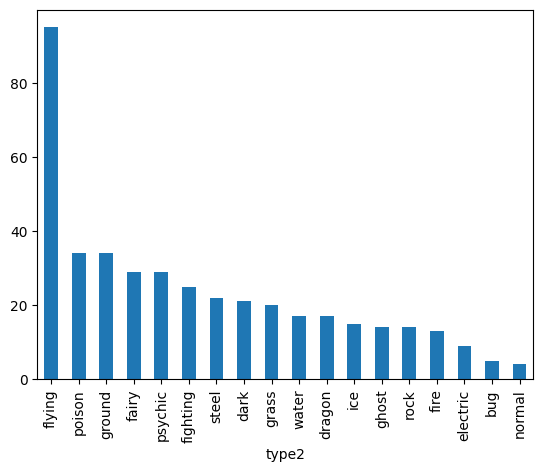

In [15]:
type_chart['type2'].value_counts().plot(kind='bar', rot=90)

In [16]:
type_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [17]:
Pokedex = Pokedex.drop('Pokemon Pic URL',axis=1)

In [18]:
Pokedex = Pokedex.drop('National Dex Number',axis=1)
Pokedex

,Pokemon Name,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)"
0,Bulbasaur,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']"
1,Ivysaur,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']"
2,Venusaur,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']"
3,Charmander,['https://www.serebii.net/pokedex-bw/type/fire...,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']"
4,Charmeleon,['https://www.serebii.net/pokedex-bw/type/fire...,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']"
...,...,...,...,...
1020,Raging Bolt,['https://www.serebii.net/pokedex-bw/type/elec...,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']"
1021,Iron Boulder,['https://www.serebii.net/pokedex-bw/type/rock...,['Quark Drive'],"['90', '120', '80', '68', '108', '124']"
1022,Iron Crown,['https://www.serebii.net/pokedex-bw/type/stee...,['Quark Drive'],"['90', '72', '100', '122', '108', '98']"
1023,Terapagos,['https://www.serebii.net/pokedex-bw/type/norm...,['Tera Shift'],"['90', '65', '85', '65', '85', '60']"


In [19]:
Pokedex['Pokemon Types'] = Pokedex['Pokemon Types'].apply(lambda x : x.split())
Pokedex

,Pokemon Name,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)"
0,Bulbasaur,[['https://www.serebii.net/pokedex-bw/type/gra...,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']"
1,Ivysaur,[['https://www.serebii.net/pokedex-bw/type/gra...,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']"
2,Venusaur,[['https://www.serebii.net/pokedex-bw/type/gra...,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']"
3,Charmander,[['https://www.serebii.net/pokedex-bw/type/fir...,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']"
4,Charmeleon,[['https://www.serebii.net/pokedex-bw/type/fir...,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']"
...,...,...,...,...
1020,Raging Bolt,[['https://www.serebii.net/pokedex-bw/type/ele...,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']"
1021,Iron Boulder,[['https://www.serebii.net/pokedex-bw/type/roc...,['Quark Drive'],"['90', '120', '80', '68', '108', '124']"
1022,Iron Crown,[['https://www.serebii.net/pokedex-bw/type/ste...,['Quark Drive'],"['90', '72', '100', '122', '108', '98']"
1023,Terapagos,[['https://www.serebii.net/pokedex-bw/type/nor...,['Tera Shift'],"['90', '65', '85', '65', '85', '60']"


In [20]:
def add_unknown(x):
    if len(x) < 1:
        x = x.append('Unknown')
        return x
    else:
        return x
Pokedex['Pokemon Types'] = Pokedex['Pokemon Types'].apply(lambda x : add_unknown(x))

In [21]:
Pokedex['Pokemon Types'][1]
Pokedex

,Pokemon Name,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)"
0,Bulbasaur,[['https://www.serebii.net/pokedex-bw/type/gra...,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']"
1,Ivysaur,[['https://www.serebii.net/pokedex-bw/type/gra...,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']"
2,Venusaur,[['https://www.serebii.net/pokedex-bw/type/gra...,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']"
3,Charmander,[['https://www.serebii.net/pokedex-bw/type/fir...,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']"
4,Charmeleon,[['https://www.serebii.net/pokedex-bw/type/fir...,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']"
...,...,...,...,...
1020,Raging Bolt,[['https://www.serebii.net/pokedex-bw/type/ele...,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']"
1021,Iron Boulder,[['https://www.serebii.net/pokedex-bw/type/roc...,['Quark Drive'],"['90', '120', '80', '68', '108', '124']"
1022,Iron Crown,[['https://www.serebii.net/pokedex-bw/type/ste...,['Quark Drive'],"['90', '72', '100', '122', '108', '98']"
1023,Terapagos,[['https://www.serebii.net/pokedex-bw/type/nor...,['Tera Shift'],"['90', '65', '85', '65', '85', '60']"


In [22]:
Pokedex[['Pokemon Type 1', 'Pokemon Type 2']] = Pokedex['Pokemon Types'].apply(lambda x : pd.Series(x))
Pokedex
Pokedex = Pokedex.drop('Pokemon Types',axis=1)

In [23]:
Pokedex

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Pokemon Type 1,Pokemon Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']",['https://www.serebii.net/pokedex-bw/type/gras...,'https://www.serebii.net/pokedex-bw/type/poiso...
1,Ivysaur,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']",['https://www.serebii.net/pokedex-bw/type/gras...,'https://www.serebii.net/pokedex-bw/type/poiso...
2,Venusaur,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']",['https://www.serebii.net/pokedex-bw/type/gras...,'https://www.serebii.net/pokedex-bw/type/poiso...
3,Charmander,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']",['https://www.serebii.net/pokedex-bw/type/fire...,NaN
4,Charmeleon,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']",['https://www.serebii.net/pokedex-bw/type/fire...,NaN
...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']",['https://www.serebii.net/pokedex-bw/type/elec...,'https://www.serebii.net/pokedex-bw/type/drago...
1021,Iron Boulder,['Quark Drive'],"['90', '120', '80', '68', '108', '124']",['https://www.serebii.net/pokedex-bw/type/rock...,'https://www.serebii.net/pokedex-bw/type/psych...
1022,Iron Crown,['Quark Drive'],"['90', '72', '100', '122', '108', '98']",['https://www.serebii.net/pokedex-bw/type/stee...,'https://www.serebii.net/pokedex-bw/type/psych...
1023,Terapagos,['Tera Shift'],"['90', '65', '85', '65', '85', '60']",['https://www.serebii.net/pokedex-bw/type/norm...,NaN


In [24]:
Pokedex['Pokemon Type 2'] = Pokedex['Pokemon Type 2'].fillna('Unkown')
Pokedex

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Pokemon Type 1,Pokemon Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']",['https://www.serebii.net/pokedex-bw/type/gras...,'https://www.serebii.net/pokedex-bw/type/poiso...
1,Ivysaur,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']",['https://www.serebii.net/pokedex-bw/type/gras...,'https://www.serebii.net/pokedex-bw/type/poiso...
2,Venusaur,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']",['https://www.serebii.net/pokedex-bw/type/gras...,'https://www.serebii.net/pokedex-bw/type/poiso...
3,Charmander,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']",['https://www.serebii.net/pokedex-bw/type/fire...,Unkown
4,Charmeleon,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']",['https://www.serebii.net/pokedex-bw/type/fire...,Unkown
...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']",['https://www.serebii.net/pokedex-bw/type/elec...,'https://www.serebii.net/pokedex-bw/type/drago...
1021,Iron Boulder,['Quark Drive'],"['90', '120', '80', '68', '108', '124']",['https://www.serebii.net/pokedex-bw/type/rock...,'https://www.serebii.net/pokedex-bw/type/psych...
1022,Iron Crown,['Quark Drive'],"['90', '72', '100', '122', '108', '98']",['https://www.serebii.net/pokedex-bw/type/stee...,'https://www.serebii.net/pokedex-bw/type/psych...
1023,Terapagos,['Tera Shift'],"['90', '65', '85', '65', '85', '60']",['https://www.serebii.net/pokedex-bw/type/norm...,Unkown


In [25]:
def clean_url(text):
    if text == 'Uknown':
        return text
    else:    
        result = text.replace('https://www.serebii.net/pokedex-bw/type/', "")
        result = result.replace('.gif',"")
        return  result
#print(clean_url('https://www.serebii.net/pokedex-bw/type/bug.shtml'))
Pokedex['Type 1'] = Pokedex['Pokemon Type 1'].apply(lambda x : clean_url(x))

In [26]:
Pokedex = Pokedex.drop('Pokemon Type 1',axis=1)

In [27]:
Pokedex['Type 2'] = Pokedex['Pokemon Type 2'].apply(lambda x : clean_url(x))


In [28]:
Pokedex = Pokedex.drop('Pokemon Type 2',axis=1)

In [29]:
Pokedex

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']","['grass',",'poison']
1,Ivysaur,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']","['grass',",'poison']
2,Venusaur,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']","['grass',",'poison']
3,Charmander,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']",['fire'],Unkown
4,Charmeleon,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']",['fire'],Unkown
...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']","['electric',",'dragon']
1021,Iron Boulder,['Quark Drive'],"['90', '120', '80', '68', '108', '124']","['rock',",'psychic']
1022,Iron Crown,['Quark Drive'],"['90', '72', '100', '122', '108', '98']","['steel',",'psychic']
1023,Terapagos,['Tera Shift'],"['90', '65', '85', '65', '85', '60']",['normal'],Unkown


In [30]:
def clean_brackets(x):
   x = x.replace("[","")
   x = x.replace("'","")
   x = x.replace("]","")
   x = x.replace(",","")
   return x
Pokedex['Type 1'] = Pokedex['Type 1'].apply(lambda x : clean_brackets(x))
Pokedex['Type 2'] = Pokedex['Type 2'].apply(lambda x : clean_brackets(x))
Pokedex

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']",grass,poison
1,Ivysaur,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']",grass,poison
2,Venusaur,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']",grass,poison
3,Charmander,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']",fire,Unkown
4,Charmeleon,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']",fire,Unkown
...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']",electric,dragon
1021,Iron Boulder,['Quark Drive'],"['90', '120', '80', '68', '108', '124']",rock,psychic
1022,Iron Crown,['Quark Drive'],"['90', '72', '100', '122', '108', '98']",steel,psychic
1023,Terapagos,['Tera Shift'],"['90', '65', '85', '65', '85', '60']",normal,Unkown


In [31]:
Pokedex.loc[901]

Pokemon Name                                                                     Basculegion
Abilities                                     ['Swift Swim', 'Adaptability', 'Mold Breaker']
Base Stats (HP, Atk, Def, SpA, SpD, Speed)            ['120', '112', '65', '80', '75', '78']
Type 1                                                                                 water
Type 2                                                                                 ghost
Name: 901, dtype: object

In [32]:
Pokedex['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'] = Pokedex['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'].apply(lambda x : clean_brackets(x))
Pokedex['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'] =  Pokedex['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'].apply(lambda x : x.split(' '))

In [33]:
Pokedex


,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","[45, 49, 49, 65, 65, 45]",grass,poison
1,Ivysaur,"['Overgrow', 'Chlorophyll']","[60, 62, 63, 80, 80, 60]",grass,poison
2,Venusaur,"['Overgrow', 'Chlorophyll']","[80, 82, 83, 100, 100, 80]",grass,poison
3,Charmander,"['Blaze', 'Solar Power']","[39, 52, 43, 60, 50, 65]",fire,Unkown
4,Charmeleon,"['Blaze', 'Solar Power']","[58, 64, 58, 80, 65, 80]",fire,Unkown
...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"[125, 73, 91, 137, 89, 75]",electric,dragon
1021,Iron Boulder,['Quark Drive'],"[90, 120, 80, 68, 108, 124]",rock,psychic
1022,Iron Crown,['Quark Drive'],"[90, 72, 100, 122, 108, 98]",steel,psychic
1023,Terapagos,['Tera Shift'],"[90, 65, 85, 65, 85, 60]",normal,Unkown


In [34]:
Pokedex['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'] = Pokedex['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'].apply(lambda x : list(map(int, x)))

In [35]:
Pokedex

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","[45, 49, 49, 65, 65, 45]",grass,poison
1,Ivysaur,"['Overgrow', 'Chlorophyll']","[60, 62, 63, 80, 80, 60]",grass,poison
2,Venusaur,"['Overgrow', 'Chlorophyll']","[80, 82, 83, 100, 100, 80]",grass,poison
3,Charmander,"['Blaze', 'Solar Power']","[39, 52, 43, 60, 50, 65]",fire,Unkown
4,Charmeleon,"['Blaze', 'Solar Power']","[58, 64, 58, 80, 65, 80]",fire,Unkown
...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"[125, 73, 91, 137, 89, 75]",electric,dragon
1021,Iron Boulder,['Quark Drive'],"[90, 120, 80, 68, 108, 124]",rock,psychic
1022,Iron Crown,['Quark Drive'],"[90, 72, 100, 122, 108, 98]",steel,psychic
1023,Terapagos,['Tera Shift'],"[90, 65, 85, 65, 85, 60]",normal,Unkown


In [36]:
Pokedex.dtypes

Pokemon Name                                  object
Abilities                                     object
Base Stats (HP, Atk, Def, SpA, SpD, Speed)    object
Type 1                                        object
Type 2                                        object
dtype: object

In [37]:
Pokedex[['HP','Atk','Def','SpA','Spd','Speed']] = Pokedex['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'].apply(lambda x : pd.Series(x))

In [38]:
Pokedex

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2,HP,Atk,Def,SpA,Spd,Speed
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","[45, 49, 49, 65, 65, 45]",grass,poison,45,49,49,65,65,45
1,Ivysaur,"['Overgrow', 'Chlorophyll']","[60, 62, 63, 80, 80, 60]",grass,poison,60,62,63,80,80,60
2,Venusaur,"['Overgrow', 'Chlorophyll']","[80, 82, 83, 100, 100, 80]",grass,poison,80,82,83,100,100,80
3,Charmander,"['Blaze', 'Solar Power']","[39, 52, 43, 60, 50, 65]",fire,Unkown,39,52,43,60,50,65
4,Charmeleon,"['Blaze', 'Solar Power']","[58, 64, 58, 80, 65, 80]",fire,Unkown,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"[125, 73, 91, 137, 89, 75]",electric,dragon,125,73,91,137,89,75
1021,Iron Boulder,['Quark Drive'],"[90, 120, 80, 68, 108, 124]",rock,psychic,90,120,80,68,108,124
1022,Iron Crown,['Quark Drive'],"[90, 72, 100, 122, 108, 98]",steel,psychic,90,72,100,122,108,98
1023,Terapagos,['Tera Shift'],"[90, 65, 85, 65, 85, 60]",normal,Unkown,90,65,85,65,85,60


In [39]:
Pokedex = Pokedex.drop('Base Stats (HP, Atk, Def, SpA, SpD, Speed)', axis=1)

In [40]:
Pokedex

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,Spd,Speed
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",grass,poison,45,49,49,65,65,45
1,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,60,62,63,80,80,60
2,Venusaur,"['Overgrow', 'Chlorophyll']",grass,poison,80,82,83,100,100,80
3,Charmander,"['Blaze', 'Solar Power']",fire,Unkown,39,52,43,60,50,65
4,Charmeleon,"['Blaze', 'Solar Power']",fire,Unkown,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],electric,dragon,125,73,91,137,89,75
1021,Iron Boulder,['Quark Drive'],rock,psychic,90,120,80,68,108,124
1022,Iron Crown,['Quark Drive'],steel,psychic,90,72,100,122,108,98
1023,Terapagos,['Tera Shift'],normal,Unkown,90,65,85,65,85,60


In [41]:
Pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pokemon Name  1025 non-null   object
 1   Abilities     1025 non-null   object
 2   Type 1        1025 non-null   object
 3   Type 2        1025 non-null   object
 4   HP            1025 non-null   int64 
 5   Atk           1025 non-null   int64 
 6   Def           1025 non-null   int64 
 7   SpA           1025 non-null   int64 
 8   Spd           1025 non-null   int64 
 9   Speed         1025 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 80.2+ KB


In [86]:
Pokedex.describe()

,HP,Atk,Def,SpA,Spd,Speed,BST
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,70.184390,77.521951,72.507317,70.080976,70.205854,67.186341,427.686829
std,26.631054,29.782541,29.286972,29.658378,26.639329,28.717227,112.770735
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,325.000000
50%,68.000000,75.000000,70.000000,65.000000,67.000000,65.000000,450.000000
75%,85.000000,100.000000,90.000000,90.000000,86.000000,88.000000,508.000000
max,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000


In [43]:
Pokedex.shape

(1025, 10)

In [44]:
Pokedex.loc[Pokedex.Atk == 5.0000]

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,Spd,Speed
112,Chansey,"['Natural Cure', 'Serene Grace', 'Healer']",normal,Unkown,250,5,5,35,105,50
439,Happiny,"['Natural Cure', 'Serene Grace', 'Friend Guard']",normal,Unkown,100,5,5,15,65,30


In [45]:
Pokedex.sort_values(by= 'Atk')

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,Spd,Speed
439,Happiny,"['Natural Cure', 'Serene Grace', 'Friend Guard']",normal,Unkown,100,5,5,15,65,30
112,Chansey,"['Natural Cure', 'Serene Grace', 'Healer']",normal,Unkown,250,5,5,35,105,50
212,Shuckle,"['Sturdy', 'Gluttony', 'Contrary']",bug,rock,20,10,230,10,230,5
241,Blissey,"['Natural Cure', 'Serene Grace', 'Healer']",normal,Unkown,255,10,10,75,135,55
128,Magikarp,"['Swift Swim', 'Rattled']",water,Unkown,20,10,55,15,20,80
...,...,...,...,...,...,...,...,...,...,...
383,Rayquaza,['Air Lock'],dragon,flying,105,150,90,150,90,95
288,Slaking,['Truant'],normal,Unkown,150,160,100,95,65,100
485,Regigigas,['Slow Start'],normal,Unkown,110,160,110,80,110,100
408,Rampardos,"['Mold Breaker', 'Sheer Force']",rock,Unkown,97,165,60,65,50,58


In [46]:
Pokedex.loc[Pokedex['Atk'] >= 100]

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,Spd,Speed
27,Sandslash,"['Sand Veil', 'Sand Rush']",ground,Unkown,75,100,110,45,55,65
33,Nidoking,"['Poison Point', 'Rivalry', 'Sheer Force']",poison,ground,81,102,77,85,75,85
50,Dugtrio,"['Sand Veil', 'Arena Trap', 'Sand Force']",ground,Unkown,35,100,50,50,70,120
56,Primeape,"['Vital Spirit', 'Anger Point', 'Defiant']",fighting,Unkown,65,105,60,60,70,95
58,Arcanine,"['Intimidate', 'Flash Fire', 'Justified']",fire,Unkown,90,110,80,100,80,95
...,...,...,...,...,...,...,...,...,...,...
1013,Okidogi,"['Toxic Chain', 'Guard Dog']",poison,fighting,88,128,115,58,86,80
1016,Ogerpon,['Defiant'],grass,Unkown,80,120,84,60,96,110
1017,Archaludon,"['Stamina', 'Sturdy', 'Stalwart']",steel,dragon,90,105,130,125,65,85
1019,Gouging Fire,['Protosynthesis'],fire,dragon,105,115,121,65,93,91


In [47]:
Pokedex.Atk.quantile(0.95)

np.float64(130.0)

In [116]:
Pokedex.loc[Pokedex['Atk'] >= 130].sort_values(by= 'BST')

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,Spd,Speed,BST
285,Breloom,"['Effect Spore', 'Poison Heal', 'Technician']",grass,fighting,60,130,80,60,60,70,460
358,Absol,"['Pressure', 'Super Luck', 'Justified']",dark,Unkown,65,130,60,75,60,75,465
98,Kingler,"['Hyper Cutter', 'Shell Armor', 'Sheer Force']",water,Unkown,55,130,115,50,50,75,475
739,Crabominable,"['Hyper Cutter', 'Iron Fist', 'Anger Point']",fighting,ice,97,132,77,62,67,43,478
554,Darmanitan,"['Sheer Force', 'Zen Mode']",fire,Unkown,105,140,55,30,55,95,480
111,Rhydon,"['Lightning Rod', 'Rock Head', 'Reckless']",ground,rock,105,130,120,45,45,40,485
588,Escavalier,"['Swarm', 'Shell Armor', 'Overcoat']",bug,steel,70,135,105,60,105,20,495
408,Rampardos,"['Mold Breaker', 'Sheer Force']",rock,Unkown,97,165,60,65,50,58,495
211,Scizor,"['Swarm', 'Technician', 'Light Metal']",bug,steel,70,130,100,55,80,65,500
878,Copperajah,"['Sheer Force', 'Heavy Metal']",steel,Unkown,122,130,69,80,69,30,500


In [49]:
Pokedex['BST'] = Pokedex[['HP','Atk','Def','SpA','Spd','Speed']].sum(axis=1)

In [50]:
Pokedex.head()

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,Spd,Speed,BST
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",grass,poison,45,49,49,65,65,45,318
1,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,60,62,63,80,80,60,405
2,Venusaur,"['Overgrow', 'Chlorophyll']",grass,poison,80,82,83,100,100,80,525
3,Charmander,"['Blaze', 'Solar Power']",fire,Unkown,39,52,43,60,50,65,309
4,Charmeleon,"['Blaze', 'Solar Power']",fire,Unkown,58,64,58,80,65,80,405


In [118]:
Pokedex_BST = Pokedex.sort_values(by='BST',ascending=False).head(10)

<Axes: >

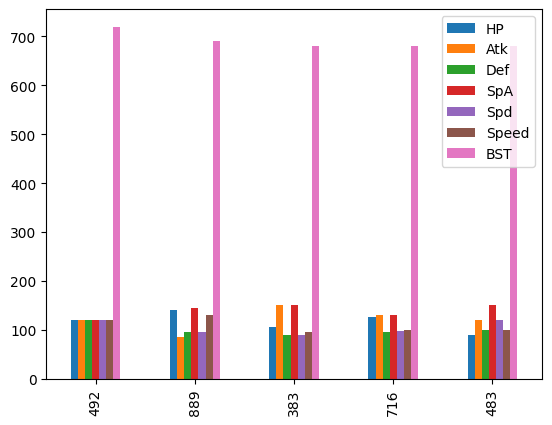

In [52]:
Pokedex_BST.plot.bar()

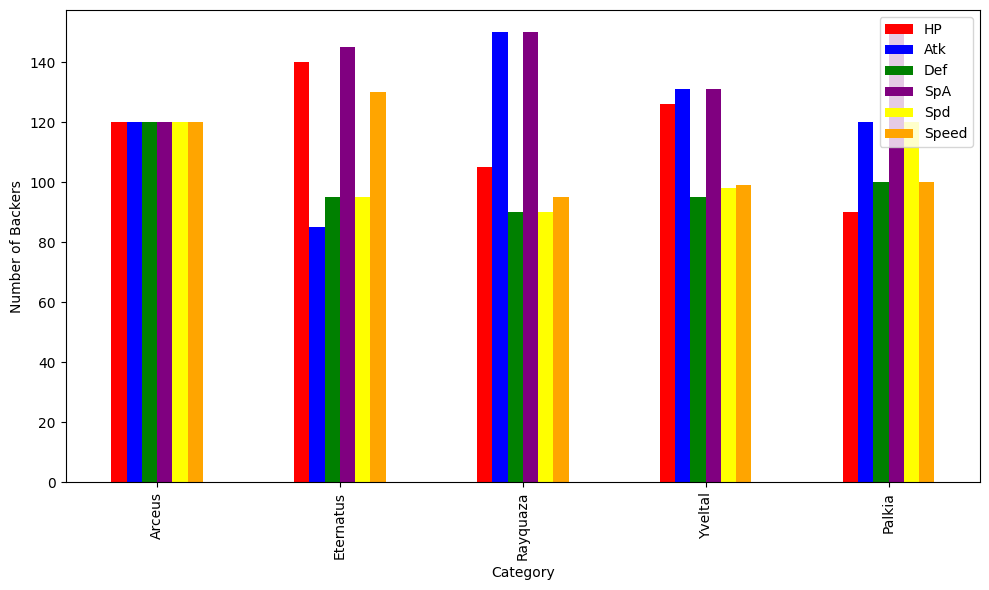

In [53]:
Pokedex_BST.plot(
    kind='bar', 
    x='Pokemon Name', 
    y=['HP','Atk','Def','SpA','Spd','Speed'], 
    rot=90, 
    color=['red','blue','green','purple','yellow','orange'], 
    figsize=(10,6)
).set(
    xlabel='Category', 
    ylabel='Number of Backers'
)
plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()          # Display the plot

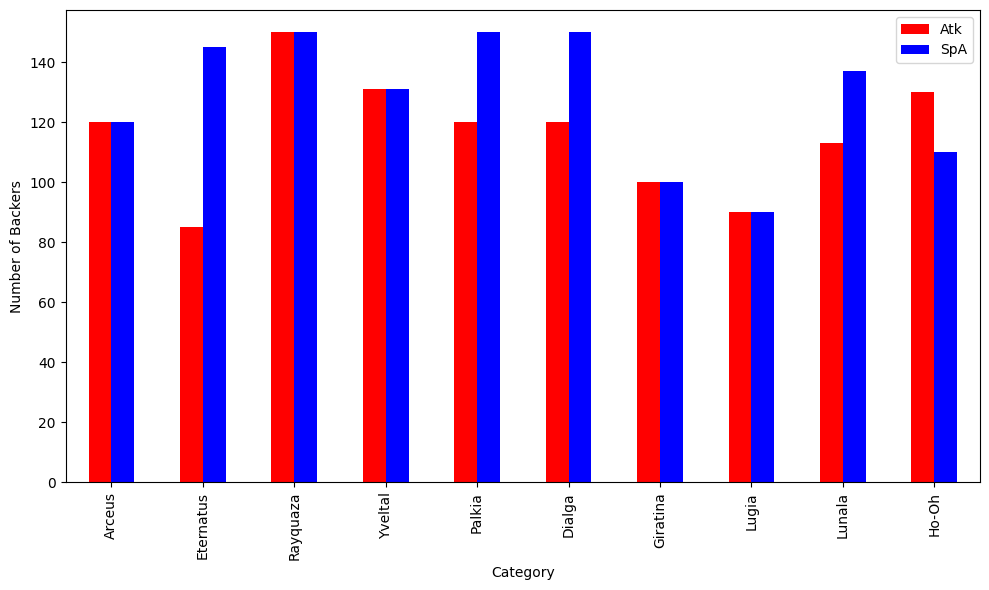

In [119]:
Pokedex_BST.plot(
    kind='bar', 
    x='Pokemon Name', 
    y=['Atk','SpA'], 
    rot=90, 
    color=['red','blue','green','purple','yellow','orange'], 
    figsize=(10,6)
).set(
    xlabel='Category', 
    ylabel='Number of Backers'
)
plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()          # Display the plot

In [55]:
Pokedex['Type 1'].value_counts()

Type 1
water       134
normal      118
grass       103
bug          83
fire         66
psychic      60
electric     59
rock         58
dark         45
poison       42
ground       40
fighting     40
dragon       37
steel        36
ghost        35
ice          31
fairy        29
flying        9
Name: count, dtype: int64

In [56]:
Pokedex['Type 2'].value_counts()

Type 2
Unkown      499
flying      100
psychic      42
poison       41
ground       35
fairy        35
fighting     33
dragon       33
ghost        30
steel        29
grass        24
dark         24
water        20
ice          17
rock         16
fire         15
normal       13
electric     10
bug           9
Name: count, dtype: int64

In [78]:
Pokedex['Pokemon Name'].loc[(Pokedex['Type 2'] == 'flying') & (Pokedex['Type 1'] == 'normal')]

15           Pidgey
16        Pidgeotto
17          Pidgeot
20          Spearow
21           Fearow
82       Farfetch'd
83            Doduo
84           Dodrio
162        Hoothoot
163         Noctowl
275         Taillow
276         Swellow
332          Swablu
395          Starly
396        Staravia
397       Staraptor
440          Chatot
518          Pidove
519       Tranquill
520        Unfezant
626         Rufflet
627        Braviary
660      Fletchling
730         Pikipek
731        Trumbeak
732       Toucannon
930    Squawkabilly
Name: Pokemon Name, dtype: object

In [76]:
int(Pokedex['Pokemon Name'].loc[(Pokedex['Type 2'] == 'flying') & (Pokedex['Type 1'] == 'normal')].count())

27

In [77]:
int(Pokedex['Pokemon Name'].loc[(Pokedex['Type 1'] == 'flying') & (Pokedex['Type 2'] == 'normal')].count())

0

In [75]:
int(Pokedex['Pokemon Name'].loc[Pokedex['Type 1'] == 'flying'].count())

9

In [115]:
Pokedex.loc[Pokedex.BST > 600].sort_values(by='Pokemon Name')

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,Spd,Speed,BST
492,Arceus,['Multitype'],normal,Unkown,120,120,120,120,120,120,720
482,Dialga,"['Pressure', 'Telepathy']",steel,dragon,100,120,120,150,100,90,680
889,Eternatus,['Pressure'],poison,dragon,140,85,95,145,95,130,690
486,Giratina,"['Pressure', 'Telepathy']",ghost,dragon,150,100,120,100,120,90,680
382,Groudon,['Drought'],ground,Unkown,100,150,140,100,90,90,670
249,Ho-Oh,"['Pressure', 'Regenerator']",fire,flying,106,130,90,110,154,90,680
1006,Koraidon,['Orichalcum Pulse'],fighting,dragon,100,135,115,85,100,135,670
381,Kyogre,['Drizzle'],water,Unkown,100,100,90,150,140,90,670
645,Kyurem,['Pressure'],dragon,ice,125,130,90,130,90,95,660
248,Lugia,"['Pressure', 'Multiscale']",psychic,flying,106,90,130,90,154,110,680
